In [20]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=pd.errors.SettingWithCopyWarning)

In [4]:
data=pd.read_csv('/kaggle/input/top-1000-youtube-channels-in-the-world/Top Youtubers Dataset.csv', encoding='latin')
data.head(5)

,Rank,Youtuber,Subscribers,Video Views,Video Count,Category,Started
0,1,MrBeast,284000000,5.240290e+10,803,Entertainment,2012
1,2,T-Series,268000000,2.586240e+11,21237,Music,2006
2,3,YouTube Movies,181000000,0.000000e+00,0,Film & Animation,2015
3,4,Cocomelon - Nursery Rhymes,177000000,1.828810e+11,1188,Education,2006
4,5,SET India,174000000,1.653950e+11,139720,Shows,2006


In [6]:
data.shape

(1000, 7)

In [7]:
data.dtypes

Rank             int64
Youtuber        object
Subscribers      int64
Video Views    float64
Video Count      int64
Category        object
Started          int64
dtype: object

In [8]:
data['Video Views']=data['Video Views'].astype(int)

In [9]:
data.dtypes

Rank            int64
Youtuber       object
Subscribers     int64
Video Views     int64
Video Count     int64
Category       object
Started         int64
dtype: object

In [13]:
d=data.isnull().sum()
print(d)

Rank            0
Youtuber        0
Subscribers     0
Video Views     0
Video Count     0
Category       43
Started         0
dtype: int64


In [21]:
data['Category'].fillna('Unknown', inplace=True)

In [22]:
d=data.isnull().sum()
print(d)

Rank           0
Youtuber       0
Subscribers    0
Video Views    0
Video Count    0
Category       0
Started        0
dtype: int64


In [24]:
data.duplicated().sum()

0

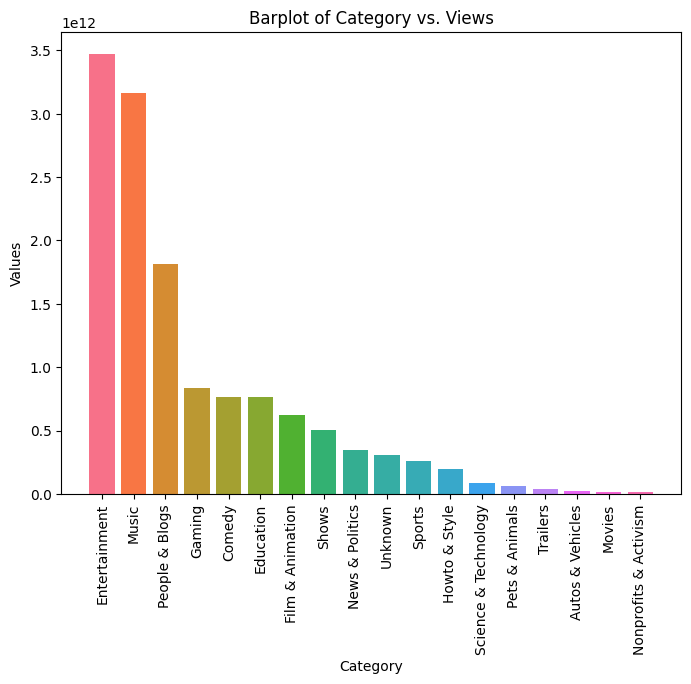

In [31]:
graph=data.groupby(['Category'],as_index=False)['Video Views'].sum().sort_values(by='Video Views',ascending=False)
palette = sns.color_palette("husl", len(graph))
plt.figure(figsize=(8, 6))
plt.bar(graph['Category'],graph['Video Views'],color=palette)
plt.xlabel('Category')
plt.xticks(rotation=90) 
plt.ylabel('Values')
plt.title('Barplot of Category vs. Views')
plt.show()

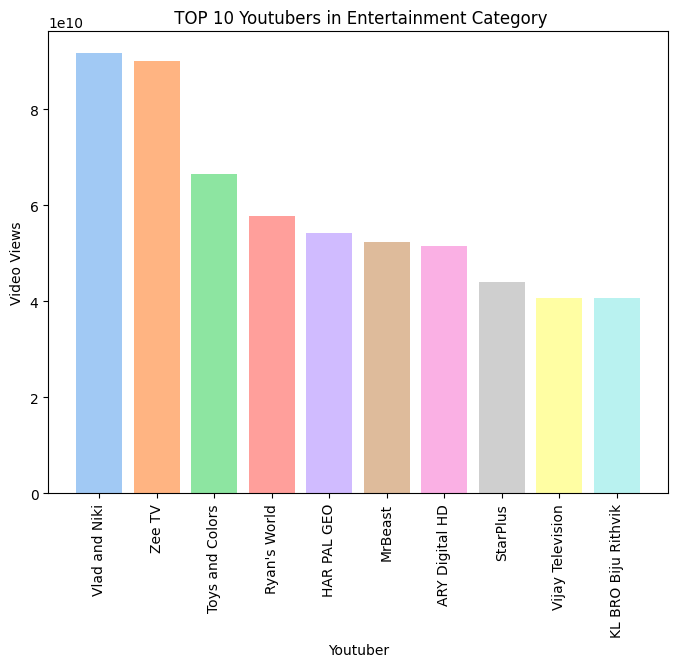

In [36]:
df=data[data['Category']=='Entertainment']
g=df.groupby(['Category','Youtuber'],as_index=False)['Video Views'].sum().sort_values(by='Video Views',ascending=False)
g_top=g.head(10)
palette = sns.color_palette("pastel", len(graph))
plt.figure(figsize=(8, 6))
plt.bar(g_top['Youtuber'],g_top['Video Views'],color=palette)
plt.xlabel('Youtuber')
plt.xticks(rotation=90) 
plt.ylabel('Video Views')
plt.title(' TOP 10 Youtubers in Entertainment Category')
plt.show()

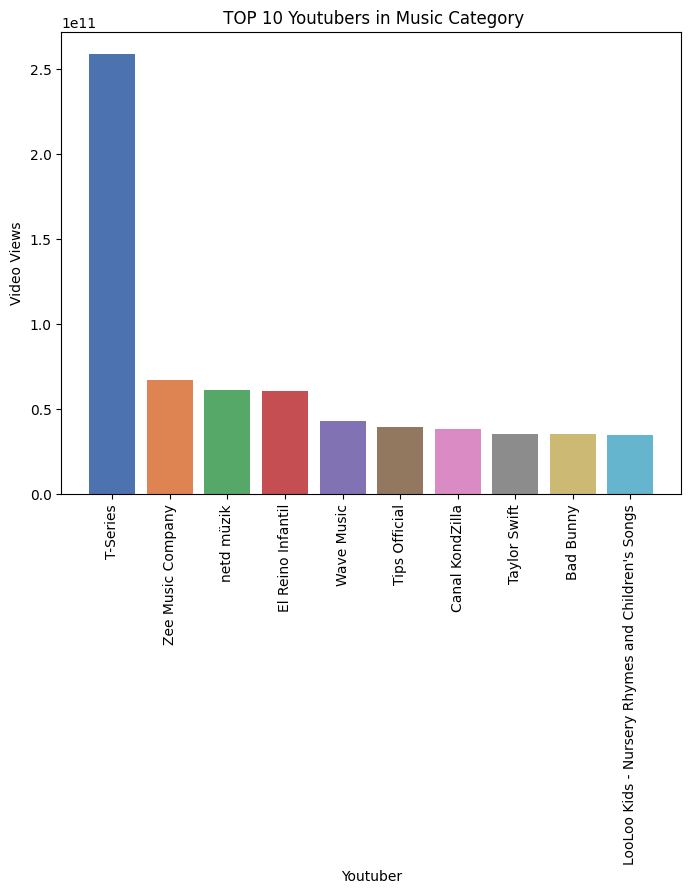

In [37]:
df=data[data['Category']=='Music']
m=df.groupby(['Category','Youtuber'],as_index=False)['Video Views'].sum().sort_values(by='Video Views',ascending=False)
m_top=m.head(10)
palette = sns.color_palette("deep", len(graph))
plt.figure(figsize=(8, 6))
plt.bar(m_top['Youtuber'],m_top['Video Views'],color=palette)
plt.xlabel('Youtuber')
plt.xticks(rotation=90) 
plt.ylabel('Video Views')
plt.title(' TOP 10 Youtubers in Music Category')
plt.show()

Correlation between Subscribers and Video Views is :  0.7323960851247199
It is a weak positive correlation


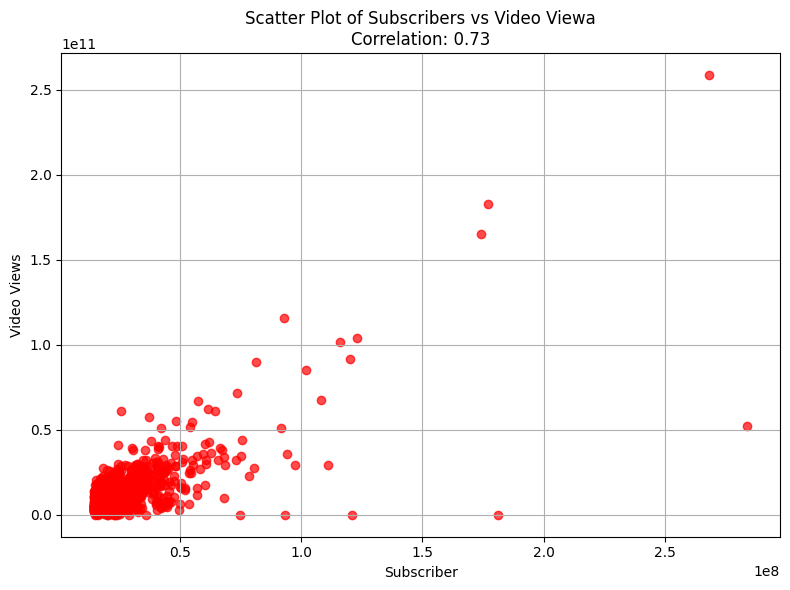

In [41]:
corr=data['Subscribers'].corr(data['Video Views'])
print("Correlation between Subscribers and Video Views is : ",corr)
print('It is a weak positive correlation')
plt.figure(figsize=(8, 6))
plt.scatter(data['Subscribers'], data['Video Views'], color='red', alpha=0.7)
plt.title(f'Scatter Plot of Subscribers vs Video Viewa\nCorrelation: {corr:.2f}')
plt.xlabel('Subscriber')
plt.ylabel('Video Views')
plt.grid(True)
plt.tight_layout()
plt.show()

In [50]:
print("Youtuber that started before the boom year of youtube(2006)")
d=data[data['Started']<2006]
print(d[['Youtuber','Started']])
print("Youtuber that started after or on the boom period of youtube(2006)")
d1=data[data['Started']>=2006]
print(d1[['Youtuber','Started']])

Youtuber that started before the boom year of youtube(2006)
                 Youtuber  Started
17                 Zee TV     2005
73                Shakira     2005
77           Ishtar Music     2005
90                Rihanna     2005
116               YouTube     1970
235       Michael Jackson     2005
282               Beyoncé     2005
294                 Smosh     2005
453                   NBA     2005
462          Romeo Santos     2005
512  Marvel Entertainment     2005
589                 Apple     2005
600                 shane     2005
627                  VICE     2005
645                  LEGO     2005
734        Jennifer Lopez     2005
781                   CNN     2005
863           PlayStation     2005
927               BIGBANG     2005
Youtuber that started after or on the boom period of youtube(2006)
                                          Youtuber  Started
0                                          MrBeast     2012
1                                         T-Series   